In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200,1)-3
y = 0.8 * X**2 +0.9 * X+2+np.random.rand(200,1)
#y=0.8x^2 + 0.9x + 2 degree 2 equation

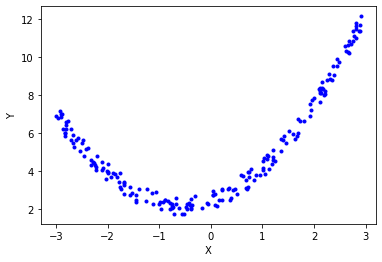

In [3]:
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Applying normal Linear Regression
You can see the model doesnt work for this kind of data form the plot below

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.06611791445831161

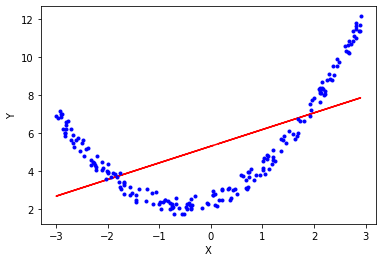

In [8]:
plt.plot(X_train,lr.predict(X_train), color="r")
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Applying  Simple Polynomial Linear Regression

In [9]:
poly = PolynomialFeatures(degree=2)
#poly = PolynomialFeatures(degree=2,include_biase=False) This will exculde x^0 value (intercept removed)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
# Polynomial feature shall only be added in the input feature not in the ouput feature
print(X_train[0])
print(X_train_trans[0]) # THis gives the 2 degree for each value x, x^1, x^2 as displayed below

[0.15202568]
[1.         0.15202568 0.02311181]


In [11]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.9820186235575171

In [13]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90842273 0.79763864]]
[2.54172329]


In [14]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

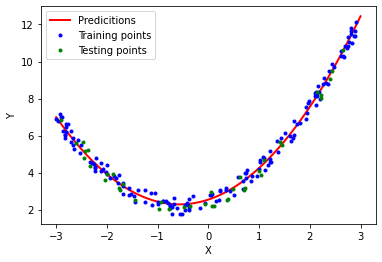

In [15]:
plt.plot(X_new, y_new, "r-",linewidth=2, label="Predicitions")
plt.plot(X_train, y_train, "b.", label = "Training points")
plt.plot(X_test, y_test, "g.", label = "Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [16]:
# changing the degree to see how the graph will behave
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

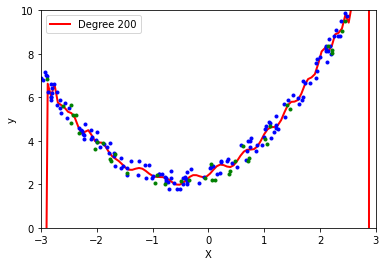

In [17]:
# give low degree it will underfit
# give high degree it will overfit
polynomial_regression(200)

# Polynomial Regression with higher dimensions

In [18]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

In [ ]:
X_multi_trans.shape

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()